# An Introduction to Co-Word Analysis

Co-word analysis is the investigation of the semantic structure of a corpus of textual data through the co-occurrence of terms. By analysing the co-occurrence of terms, a network of connected terms is generated, which enables the application of algorithms developed in graph theory to uncover underlying structures (normally referred to as themes) and examine the nature of the connections behind the terms. For example, centrality measures are often used to identify the most important and influential terms within the network structure. In addition, clustering algorithms such as Louvain community partitioning are used to identify groups of highly connected terms within a network. A primary application of co-word analysis has been the identification of research themes and key terms within scientific communities cite{ding2001, coulter1998, liu2014}.

This notebook provides a brief introduction and demmonstration of some of the techniques that are used in co-word analysis. Hopefully it will give you a good starting point as well as the confidence to try it out on your datasets. In this introduction, we will be applying co-word analysis on the keywords used by conference papers in DESIGN 2012.

The analysis is broken down in 5 steps and covers:

* Importing the relevant python packages and data;
* Generating a co-word network of keywords;
* Visualising the co-word network;
* Clustering the co-word network; and,
* Identifying key terms within the network.


In [95]:
# A line of code that jupyter notebook uses to plot the images inline with the code and text
%matplotlib inline

import networkx as nx
import json
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 300
import matplotlib.pyplot as plt
import collections
from stop_words import get_stop_words

In [96]:
# load the data from the file
with open('DESIGN2012.json', 'r', encoding='iso-8859-15') as f:
    data = f.read()

# read json object
data = json.loads(data)
papers = data['rows']
# pretty print an example data row
print(papers[0])

{'publication_title': 'THE UNDERLYING RELATIONSHIPS BETWEEN SUCCESS CRITERIA &amp; SUCCESS FACTORS IN NPD ACTIVITIES', 'publication_conf_code': 'DESIGN 2012', 'publication_author': 'Achiche S., Howard T. J., McAloone T. C., Deng L., Baron L.', 'publication_keyword': 'new product development, success criteria and factors, project management'}


Number of Keywords: 843
[('design process', 10), ('knowledge management', 7), ('design methods', 7), ('product development', 7), ('product development process', 6), ('product-service systems', 5), ('creativity', 5), ('innovation', 5), ('design structure matrix', 5), ('design', 5)]


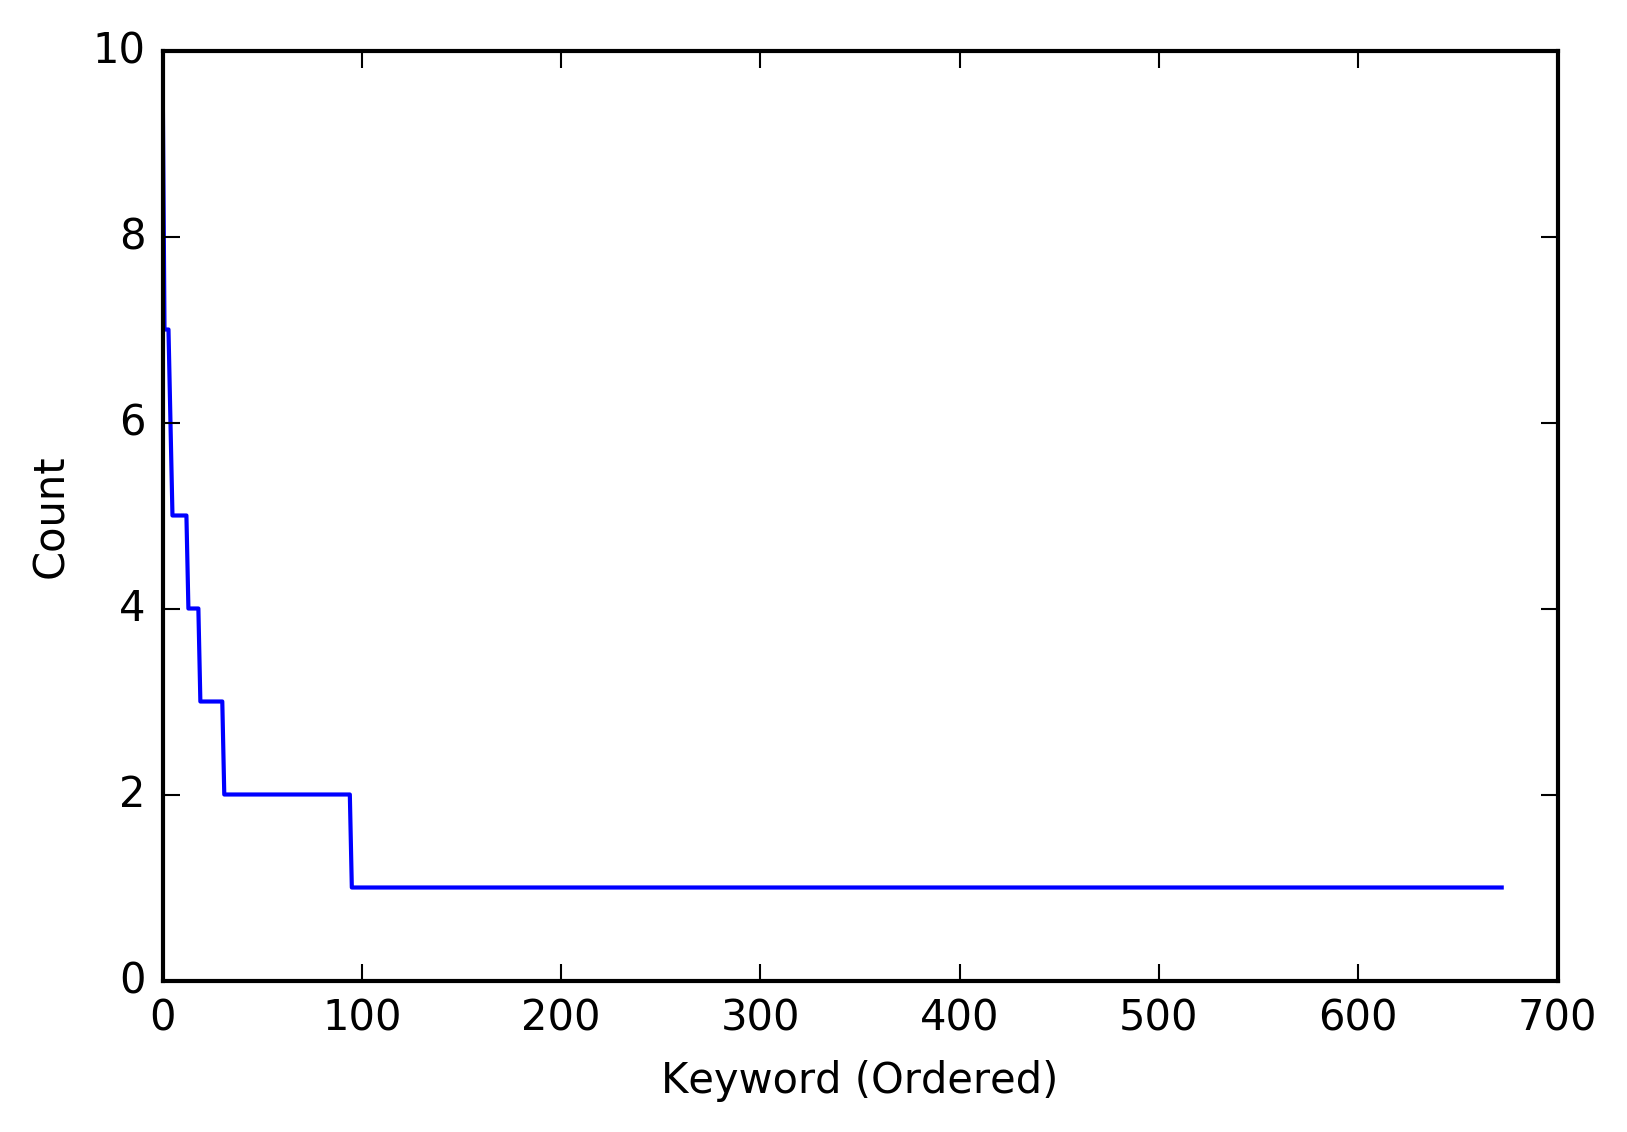

In [97]:
keyword_list = []
for paper in papers:
    keywords = paper['publication_keyword'].lower().split(',') # splitting keywords
    keywords = [x.strip() for x in keywords] # stripping whitespace
    keyword_list.extend(keywords)
    
print('Number of Keywords:', len(keyword_list))
keyword_list = collections.Counter(keyword_list).most_common()
print(keyword_list[0:10])

# create list of appearence for plotting
y = [k[1] for k in keyword_list]

plt.plot(y)
plt.ylim(0, 10)
plt.xlabel('Keyword (Ordered)')
plt.ylabel('Count')
plt.show()

In [98]:
# Generate Graph
g = nx.Graph()

# Get the keywords of interest
keywords_of_interest = []
for keyword in keyword_list:
    if keyword[1] > 1:
        keywords_of_interest.append(keyword[0])
        



In [99]:
from IPython.core.display import HTML

styles = open("../styling/custom.css", "r").read()
HTML("<style>"+styles+"</style>")